In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import binom
import numpy as np
import scipy.stats as stats
import math

Loi De Bernoulli 

In [2]:
#Chargement du fichier 
data = pd.read_csv('Dataset_composants_defectueux.csv')

#Estimation de la probabilité
p = data['defectueux'].mean()

print(p*100)

7.223942208462332


Loi binomiale

In [3]:
#Chargement du fichier csv

df = pd.read_csv('Dataset_lot_puce_defectueuses.csv')
df.head(5)

,id_puce,lot_id,défectueux
0,1,1,Non défectueux
1,2,1,Non défectueux
2,3,1,Non défectueux
3,4,1,Non défectueux
4,5,1,Non défectueux


In [4]:
#Estimation globale 

df['défectueux'] = df['défectueux'].apply(lambda x: 1 if x == "Défectueux" else 0)
prportion_moy = df['défectueux'].mean() 
print(prportion_moy)


0.0995


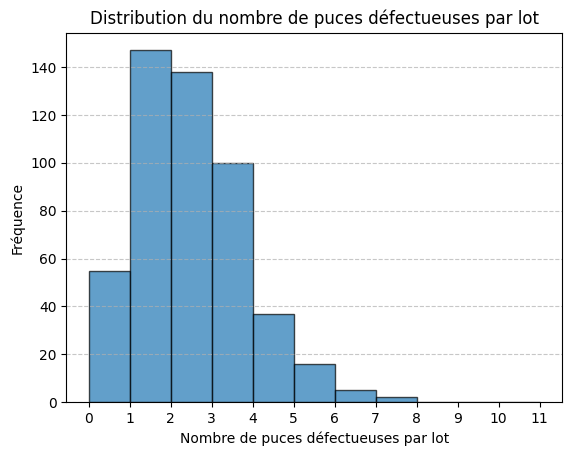

In [6]:
#Variabilité

df_lots = df.groupby('lot_id')['défectueux'].sum().reset_index()

# Tracer l'histogramme
plt.hist(df_lots['défectueux'], bins=range(0, 12), alpha=0.7, edgecolor='black')
plt.xlabel("Nombre de puces défectueuses par lot")
plt.ylabel("Fréquence")
plt.title("Distribution du nombre de puces défectueuses par lot")
plt.xticks(range(0, 12))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [7]:
#Probabilité d’un lot problématique

proba_min5 = (df_lots['défectueux'] >= 5).mean()
print(proba_min5)

0.046


In [8]:
#Décision qualité

printpourcentage_rejet = proba_min5*100
print(printpourcentage_rejet)

4.6


In [13]:
#Amélioration

def trouver_p_cible():
    for p in np.arange(0.01, 0.1, 0.001):  
        proba_rejet = 1 - binom.cdf(4, 20, p)  # P(X ≥ 5) = 1 - P(X ≤ 4)
        if proba_rejet <= 0.05:
            return p
    return None

p_maximal = trouver_p_cible()
print(p_maximal)


0.01


Loi de poisson

In [5]:
#Dimensionnement des équipes 

lambda_ = 30  
commandes_par_employe = 5
seuil_engorgement = 0.9

def dimensionnement_equipes(lambda_, commandes_par_employe, seuil):
    employes = math.ceil(lambda_ / commandes_par_employe)
    while stats.poisson.cdf(employes * commandes_par_employe, lambda_) > seuil:
        employes -= 1
    return employes + 1
employes = dimensionnement_equipes(lambda_, commandes_par_employe, seuil_engorgement)

print(employes)

7


In [7]:
#Gestion des pics de commande

def probabilite_pic_commande(lambda_, seuil):
    return 1 - stats.poisson.cdf(seuil, lambda_)
prob_pic = probabilite_pic_commande(30, 40)

print(prob_pic)

0.03230957416587421


In [8]:
#Délais de livraison

def probabilite_retard(lambda_, capacite_camion, temps):
    lambda_total = lambda_ * temps
    return 1 - stats.poisson.cdf(capacite_camion, lambda_total)
prob_retard = probabilite_retard(30, 60, 2)

print(prob_retard)

0.4657375276390413


In [9]:
#Anticipation du week-end

lambda_weekend = 30 * 1.2  # Augmentation de 20%
seuil_weekend = 0.95  # Risque d'engorgement réduit à 5%

employes_weekend = dimensionnement_equipes(lambda_weekend, commandes_par_employe, seuil_weekend)

print(employes_weekend)

9


In [16]:
#Planification d’urgence

# 1 Augmenter la cadence des camions

camion_black_friday = probabilite_retard(60, 60, 1)
print(camion_black_friday)

0.4657375276390413


La probalibilité est faible donc on doit augmenter la fréquence des camions, donc il faut augmenter les camions, qui est une solution rapide à mettre en place, mais ça peut être coûteux si la logistique ne suit pas.

In [17]:
#Planification d’urgence

# 2 Embaucher des employés temporaires

employes_black_friday = dimensionnement_equipes(60, 5, 0.9)
print(employes_black_friday)

13


Le résultat est raisonnable, donc l'embauchment temporaire est une bonne solution elle réduit aussi l'engorgement, malgré que ça peut coûter un peu cher en formation et contrats temporaires.

Activité Monte Carlo

In [44]:
#Simulation basique

def estimation_pi(n_points):
    x = np.random.uniform(-1, 1, n_points)
    y = np.random.uniform(-1, 1, n_points)
    inside_circle = np.sum(x**2 + y**2 <= 1)
    return (inside_circle / n_points) * 4  # Approximation de pi

pi_estimate_10000 = estimation_pi(10000)

print(pi_estimate_10000)

3.1544


In [46]:
# Impact du nombre de simulations

pi_estimate_100000 = estimation_pi(100000)

print(pi_estimate_100000)

3.14196


En augmentant le nombre de point à 100000 on s'approche plus à la valeur de pi.
Oui, l'augmentation du nombre de points améliore plus la précision de l'estimation de pi.

In [47]:
#Erreur d’estimation

vrai_pi = np.pi
error_10000 = abs(pi_estimate_10000 - vrai_pi) / vrai_pi
error_100000 = abs(pi_estimate_100000 - vrai_pi) / vrai_pi

print(error_10000)
print(error_100000)

0.004076704978149292
0.00011692999402300474


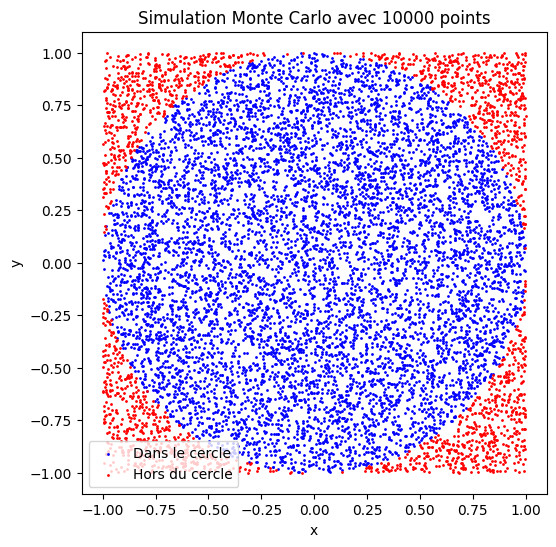

In [51]:
#Visualisation avec 10000 points

def plot_monte_carlo(n_points):
    x = np.random.uniform(-1, 1, n_points)
    y = np.random.uniform(-1, 1, n_points)
    inside_circle = x**2 + y**2 <= 1

    plt.figure(figsize=(6,6))
    plt.scatter(x[inside_circle], y[inside_circle], color='blue', s=1, label="Dans le cercle")
    plt.scatter(x[~inside_circle], y[~inside_circle], color='red', s=1, label="Hors du cercle")
    plt.legend()
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(f"Simulation Monte Carlo avec {n_points} points")
    plt.show()
plot_monte_carlo(10000)

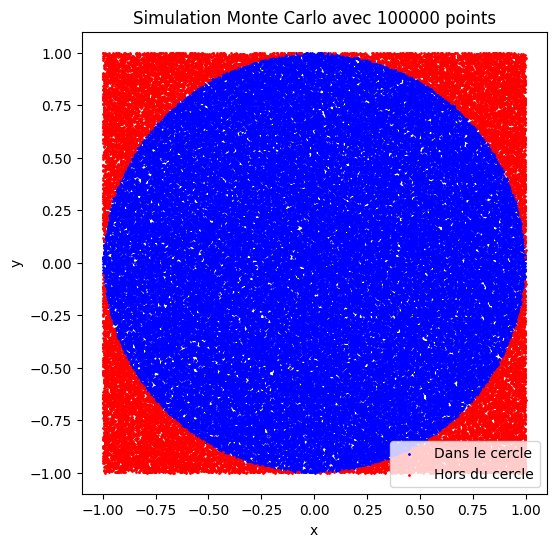

In [52]:
#Visualisation avec 100000 points

def plot_monte_carlo(n_points):
    x = np.random.uniform(-1, 1, n_points)
    y = np.random.uniform(-1, 1, n_points)
    inside_circle = x**2 + y**2 <= 1

    plt.figure(figsize=(6,6))
    plt.scatter(x[inside_circle], y[inside_circle], color='blue', s=1, label="Dans le cercle")
    plt.scatter(x[~inside_circle], y[~inside_circle], color='red', s=1, label="Hors du cercle")
    plt.legend()
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(f"Simulation Monte Carlo avec {n_points} points")
    plt.show()
plot_monte_carlo(100000)

Utilisation de la méthode Monte Carlo

La méthode de Monte Carlo fonctionne bien pour estimer pi, car elle repose sur une simulation probabiliste simple qui utilise des principes géométriques (cercle et carré), et plus le nombre de points (N) est élevé (comme dans l'exercice) plus l'estimation devient précise.

Cependant, il y a des limites :
La méthode est lente pour obtenir des estimations très précises.
Elle repose sur l'aléa, donc une erreur est toujours présente, bien que la probabilité de cette erreur diminue avec l'augmentation du nombre de points.
Les estimations de pi sont asymptotiques, ce qui signifie qu'il faut un grand nombre de points pour obtenir une estimation très précise.